# Machine Learning on Reactor Toy Model: Import and Split into Training / Test Sets

In [74]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

%matplotlib inline

# n_mult=1
# noise_level=.05

directory= './data_gen3/'
# directory= './Data/Local Sensitivity Expanded/'
# directory = './Data/Global Sensitivity/'
runs = []
for filename in os.listdir(directory):
    if filename.startswith('data'):
#         run = int(filename.split('_')[2].split('.')[0])
        run = int(filename.split('data')[1].split('.')[0])
#         print run
        runs.append(run)
# print runs[0] 

# for i in range(1000):
#     runs.append(random.randint(0,10000))
count=0

lintimes = np.linspace(1,500,500)
# set up the Pandas Dataframes
c1=pd.DataFrame(columns=range(500),dtype=np.float64)
temps=pd.DataFrame(columns=range(500),dtype=np.float64)
# times=pd.DataFrame(columns=range(500),dtype=np.float64)
vals=pd.DataFrame(columns=range(10),dtype=np.float64)
# temp1=[]
# temp2=[]
# temp3=[]
# names=[]
count=0
count2=0
# Iterate through the files
import time
st=time.time()
st1=time.time()
for run in sorted(runs):
#     print run
#     count=count+1
    if True:
        filename = 'data' + str(run) + '.csv'
        data = pd.read_csv(directory + filename, sep=',')
        temp1=[float(data.columns[0])] #time
        temp2=[float(data.columns[2])] #Cr
        temp3=[float(data.columns[3])] #temp
        temp4=[float(data.columns[4])] #input
        c1out=[]
        Tout=[]
        # parse the data
        count+=1
        for column in data.columns:
            if column == data.columns[0]: #pull out time
                temp1=np.concatenate((temp1,data[column].tolist()))
            if column == data.columns[2]: #pull out CR
                temp2=np.concatenate((temp2,data[column].tolist()))
            if column == data.columns[3]: #pull out temp
                temp3=np.concatenate((temp3,data[column].tolist()))
            if column == data.columns[4]: #pull out Ti values
                temp4=np.concatenate((temp4,data[column].tolist()))[0:10]
        
        #Impose a linear fit on each data set to ensure the same number of points per trial
        c1out=np.interp(lintimes,temp1,temp2)
        Tout=np.interp(lintimes,temp1,temp3)
        #Assign to dataframes
#         times.loc[run,:]=temp1
        c1.loc[run,:]=c1out
        temps.loc[run,:]=Tout
        vals.loc[run,:]=temp4
        if count==100:
            count=0
            print count2, time.time()-st1
            count2+=1
            st1=time.time()
        


# for column in data.columns:
#     if column.find('olts') + column.find('urrent') + column.find('ime') < -2:
#         if data[column][0]!=0:
#             names.append(column) 

# # Split the data into 'test' and 'training' sets
train = sorted(random.sample(range(c1.shape[0]), int(c1.shape[0]*(3.0/4))))
test = [x for x in range(c1.shape[0]) if x not in train]
P=vals
P_mean = P.mean()
P_std = P.std()

# # Normalize the data
# P = (P - P.mean())/P.std()

# times_train=times.iloc[train,:]
ZZ_train = temps.iloc[train,:]
Z_train = c1.iloc[train,:]
P_train = P.iloc[train,:]

# times_test = times.iloc[test,:]
ZZ_test = temps.iloc[test,:]
Z_test = c1.iloc[test,:]
P_test = P.iloc[test,:]

X2_train = pd.DataFrame()
X_train = pd.DataFrame()
Y_train = pd.DataFrame()

# X_train_noise = pd.DataFrame()
# X_test_noise = pd.DataFrame()

X2_test = pd.DataFrame()
X_test = pd.DataFrame()
Y_test = pd.DataFrame()

# # Add noise and possibly duplicate
# for _ in range(n_mult):
                      
#     X_test_noise = pd.concat((X_test, Z_test + np.random.randn(Z_test.shape[0],Z_test.shape[1])*noise_level))
#     X_train_noise = pd.concat((X_train, Z_train + np.random.randn(Z_train.shape[0],Z_train.shape[1])*noise_level))
X2_train = pd.concat((X2_train, ZZ_train))    
Y_train = pd.concat((Y_train, P_train))
X_train = pd.concat((X_train, Z_train))

X2_test = pd.concat((X2_test, ZZ_test)) 
X_test = pd.concat((X_test, Z_test))  
Y_test = pd.concat((Y_test, P_test))

# Swap these to train the model forwards

# times_train=np.array(times_train)    
# X_train_noise = np.array(X_train_noise)
X2_train = np.array(X2_train)
X_train = np.array(X_train)
Y_train = np.array(Y_train)


# times_test=np.array(times_test)
# X_test_noise = np.array(X_test_noise)
X2_test = np.array(X2_test)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


# YY_train = Y_train
# XX_train = X_train
print('done')
print (time.time()-st), "seconds for 1k"
# X_full = np.array(volts)
# Y_full = np.array(vals)
# print(count)

0 0.509999990463
1 0.68499994278
2 0.810000181198
3 0.835000038147
4 1.76999998093
5 1.30999994278
6 1.5529999733
7 1.24900007248
8 1.22600007057
done
11.3280000687 seconds for 1k


In [75]:
# print runs[len(runs)-1]
# print 13./3600*263, 'hours for 263k'
# print temp1[len(temp1)-1]
# outx = np.linspace(1,temp1[len(temp1)-1],500)
# # print outx
# output1=np.interp(outx,temp1,temp2)
# # print output1
# plt.plot(temp1,temp2)
# plt.plot(outx,output1)
# plt.show

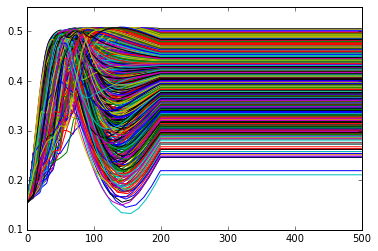

In [76]:
y_1=[]
for i in range(500):
    y_1.append(i)
for i in range(749):
    plt.plot(y_1,X_train[i])
#     plt.plot(y_1,X_train_noise[i][153:204])

plt.xlim()
plt.show()

In [77]:
# Running different Regression methods
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

import time
print("extra trees")
start_time = time.time()
etr1 = ExtraTreesRegressor(n_estimators=10, n_jobs=-1,max_depth=16)
etr1.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', etr1.score(Y_test,X_test), 'Train:', etr1.score(Y_train,X_train))
start_time = time.time()

#Decision tree
import time
print("decision tree")
start_time = time.time()
dt = DecisionTreeRegressor()
dt.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', dt.score(Y_test,X_test), 'Train:', dt.score(Y_train,X_train))
start_time = time.time()

# import time
# print("extra trees")
# start_time = time.time()
# ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=100)
# ada.fit(X_train[1],Y_train[1])
# print("--- %s seconds ---" % (time.time() - start_time))
# print('Test:', ada.score(X_test,Y_test), 'Train:', ada.score(X_train,Y_train))
# start_time = time.time()

print("KNN")
start_time = time.time()
knn = KNeighborsRegressor(n_neighbors=6,weights = 'distance')
knn.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', knn.score(Y_test,X_test), 'Train:', knn.score(Y_train,X_train))

print("linear")
start_time = time.time()
lin = linear_model.LinearRegression()
lin.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', lin.score(Y_test,X_test), 'Train:', lin.score(Y_train,X_train))

# print 'GBR'
# start_time=time.time()
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01, 'loss': 'ls'}
# gbr = GradientBoostingRegressor(**params)
# gbr.fit(X_train, Y_train)


extra trees
--- 0.935000181198 seconds ---
('Test:', 0.71115966208110926, 'Train:', 0.99998731814645514)
decision tree
--- 0.309000015259 seconds ---
('Test:', 0.22181911526370116, 'Train:', 1.0)
KNN
--- 0.00399994850159 seconds ---
('Test:', 0.81819602024179516, 'Train:', 1.0)
linear
--- 0.0190000534058 seconds ---
('Test:', 0.90177077988200161, 'Train:', 0.89538077297332319)


In [78]:
# import time
# start_time = time.time()
# for i in range(100):
#     etr1.predict(X_test[1].reshape(1,-1))
# print (time.time()-start_time)/100, 'seconds per prediction'

In [79]:
# import time
# start_time = time.time()
# for i in range(100):
#     dt.predict(X_test[1].reshape(1,-1))
# print (time.time()-start_time)/100, 'seconds per prediction'

In [80]:
# import time
# start_time = time.time()
# for i in range(100):
#     knn.predict(X_test[1].reshape(1,-1))
# print (time.time()-start_time)/100, 'seconds per prediction'

In [81]:
# clf2 = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
#           max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
#           min_samples_leaf=7, min_samples_split=2,
#           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
#           oob_score=False, random_state=12, verbose=0, warm_start=False)
# clf2.fit(X_train,Y_train)
# print clf2.score(X_train,Y_train)
# print clf2.score(X_test, Y_test)

In [82]:
# clf3 = ExtraTreesRegressor(n_jobs=-1,n_estimators=500,random_state=12)
# clf3.fit(X_train,Y_train)
# print clf3.score(X_train,Y_train)
# print clf3.score(X_test, Y_test)
# print clf3.predict(X_test[5].reshape(1,-1))-Y_test[5]

In [83]:
# print clf2.predict(X_test[5].reshape(1,-1))-Y_test[5]

In [84]:
# r.grid_scores_[6].cv_validation_scores

In [85]:
# print r.best_estimator_
# print r.best_estimator_.score(X_test,Y_test)
# test1 = r.best_estimator_.predict(X_test[1].reshape(1,-1))-Y_test[1]
# test2 = etr1.predict(X_test[1].reshape(1,-1))-Y_test[1]


### Learn about Hyperparameters

In [86]:
#list hyperparameters
# etr.get_params()

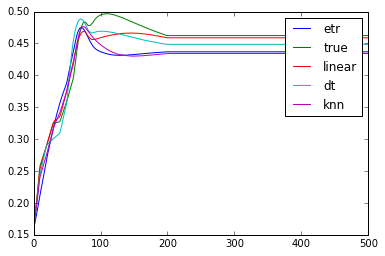

In [87]:
# print etr1.predict(Y_train[2].reshape(1,-1)).tolist()[0]
# print 
n=140
q=Y_test[n].reshape(1,-1)
# print (Y_test[n]*P_std)+P_mean
plt.plot(y_1,etr1.predict(q).tolist()[0],label='etr')
plt.plot(y_1,X_test[n],label='true')
plt.plot(y_1,lin.predict(q).tolist()[0],label='linear')
plt.plot(y_1,dt.predict(q).tolist()[0],label='dt')
plt.plot(y_1,knn.predict(q).tolist()[0],label='knn')
plt.legend()
plt.show()

# Time to practice fitting a learning algorithm to the outputs of learning algorithms!!

In [88]:
# Set up the y_train dataset, which is the outputs of all the data sets...
qq=lin.predict(Y_train)
qq = np.concatenate((qq,etr1.predict(Y_train)),axis=1)
qq = np.concatenate((qq,dt.predict(Y_train)),axis=1)
qq = np.concatenate((qq,knn.predict(Y_train)),axis=1)

qqq=lin.predict(Y_test)
qqq = np.concatenate((qqq,etr1.predict(Y_test)),axis=1)
qqq = np.concatenate((qqq,dt.predict(Y_test)),axis=1)
qqq = np.concatenate((qqq,knn.predict(Y_test)),axis=1)
print qq.shape


(749L, 2000L)


In [89]:
print("linear")
start_time = time.time()
# lin2 = linear_model.LinearRegression()
lin2=ExtraTreesRegressor(n_estimators=10, n_jobs=-1,max_depth=10)
lin2.fit(qq,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', lin2.score(qqq,X_test), 'Train:', lin2.score(qq,X_train))

linear
--- 21.7749998569 seconds ---
('Test:', 0.7689160825397322, 'Train:', 0.9989826964620202)


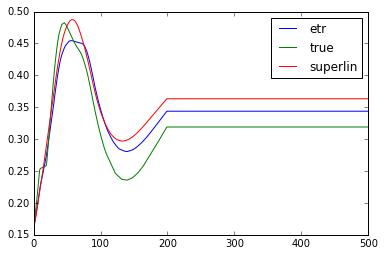

In [90]:
n=173
q=Y_test[n].reshape(1,-1)
# print (Y_test[n]*P_std)+P_mean
plt.plot(y_1,etr1.predict(q).tolist()[0],label='etr')
plt.plot(y_1,X_test[n],label='true')
# plt.plot(y_1,lin.predict(q).tolist()[0],label='linear')
# plt.plot(y_1,dt.predict(q).tolist()[0],label='dt')
# plt.plot(y_1,knn.predict(q).tolist()[0],label='knn')
plt.plot(y_1,lin2.predict(qqq[n].reshape(1,-1)).tolist()[0],label='superlin')
plt.legend()
plt.show()

# Time to write a poopy optimizer (maybe a genetic algorithm?)

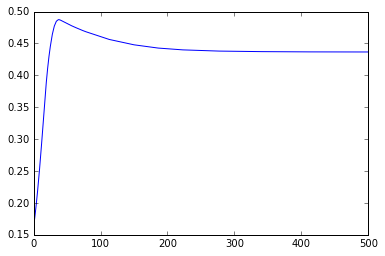

In [91]:
#import target curve:
targetdata = pd.read_csv(directory + 'target2.csv', sep=',')
temp6=[float(data.columns[0])] #time
temp5=[float(targetdata.columns[1])] #CR
temp6=np.concatenate((temp6,targetdata[targetdata.columns[0]].tolist()))
temp5=np.concatenate((temp5,targetdata[targetdata.columns[1]].tolist()))
y_2=np.linspace(1,500,500)
c1out=np.interp(y_2,temp6,temp5)
targetdata=c1out.tolist()
# print len(temp5), len(y_1)
# print targetdata = np.arr
plt.plot(y_1,targetdata)
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Set up genetic algorithm component
#create a random string for the individual
def individual(length, min, max):
    'Create a member of the population.'
    return [ random.randint(min,max) for x in xrange(length) ]

#assemble them into a population
def population(count, length, min, max):
    """
    Create a number of individuals (i.e. a population).

    count: the number of individuals in the population
    length: the number of values per individual
    min: the min possible value in an individual's list of values
    max: the max possible value in an individual's list of values
 
    """
    return [ individual(length, min, max) for x in xrange(count) ]
def fitness(individual1, target):
#     print etr1.predict(individual1)[0]
    rms=sqrt(mean_squared_error(etr1.predict(np.asarray(individual1).reshape(1,-1))[0], target))
    return rms
from operator import add
def grade(pop, target):
    'find average fitness for population'
    summed = reduce(add, (fitness(x,target) for x in pop), 0)
    return summed/(len(pop)*1.0)
x=population(3,10,0,600)
# print etr1.predict(np.asarray(x[0]).reshape(1,-1))
# grade(x,targetdata)
# chance_to_mutate = 0.01


def evolve(pop, target, retain=0.3, random_select=0.05, mutate=0.2):
    st=time.time()
#     print 'startingg'
    graded = [ (fitness(x, target), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]
#     print time.time()-st, 1
    # randomly add other individuals to promote genetic diversity
    for individual in graded[retain_length:]:
        if random_select > random.random():
            parents.append(individual)
#     print time.time()-st, 2
    # mutate some individuals
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = random.randint(0, len(individual)-1)
            # this mutation is not ideal, because it
            # restricts the range of possible values,
            # but the function is unaware of the min/max
            # values used to create the individuals,
            individual[pos_to_mutate] = random.randint(
                0, 600)
#     print time.time()-st, 3
    # crossover parents to create children
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
#         print len(children), desired_length, parents_length
        male = random.randint(0, parents_length-1)
        female = random.randint(0, parents_length-1)
#         print male, female
        if male != female:
#             print male
            male = parents[male]
            female = parents[female]
            half = len(male) / 2
            child = male[:half] + female[half:]
            children.append(child)
#             print 'ok'
#     print time.time()-st, 4
    parents.extend(children)
#     print time.time()-st, 5
    return parents

print 'done'


done


In [105]:
from tqdm import *
p_count=40
i_length=10
i_min=0
i_max=500
p=population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p,targetdata),]
# print 'starting'
# print p
for i in tqdm(range(100)):
#     time.sleep(0.01)
# for i in xrange(10):
# print p
    p=evolve(p,targetdata)
# print p
    fitness_history.append(grade(p,targetdata))
#     print i
for datum in fitness_history:
    print datum
print p

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:47<00:00, 10.72s/it]


0.0742139497943
0.0551144568247
0.0329010538188
0.0263126736359
0.0239001766369
0.0200350686415
0.0193224788315
0.0188722123794
0.0193447347988
0.0215632530862
0.0187492333779
[[249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 596, 218, 46], [249, 61, 46, 408, 459, 365, 282, 596, 229, 46], [249, 61, 46, 408, 459, 365, 282, 596, 229, 46], [239, 61, 46, 227, 459, 365, 282, 534, 229, 46], [239, 61, 46, 227, 459, 365, 282, 534, 229, 46], [239, 61, 46, 227, 459, 365, 282, 534, 229, 46], [239, 61, 46, 227, 459, 365, 282, 534, 229, 46], [239, 61, 46, 227, 101, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 596, 229, 46], [239, 61, 46, 227, 459, 365, 282, 534, 229, 46], [249, 61, 46, 408, 459, 365, 282, 534, 229, 46], [239, 61, 46, 227, 459, 365, 282, 596, 

In [94]:
#What about if we train a model in reverse and feed in our ideal curve?
# print X_test
# print Y_test
print("extra trees")
start_time = time.time()
etr2 = ExtraTreesRegressor(n_estimators=100, n_jobs=-1,max_depth=16)
etr2.fit(X_train,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', etr2.score(X_test,Y_test), 'Train:', etr2.score(X_train,Y_train))

print("linear")
start_time = time.time()
lin3 = linear_model.LinearRegression()
lin3.fit(X_train,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', lin3.score(X_test,Y_test), 'Train:', lin3.score(X_train,Y_train))

targetpred = etr2.predict(np.asarray(targetdata))
linpred = lin3.predict(np.asarray(targetdata))

print targetpred
print linpred

extra trees
--- 4.96900010109 seconds ---
('Test:', 0.48356614499703621, 'Train:', 1.0)
linear
--- 0.115999937057 seconds ---
('Test:', 0.82468075863216128, 'Train:', 0.91762312549016301)


C:\Users\Neal\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Neal\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[  59.174311   82.788413  172.23602   352.03636   393.27584   213.17028
   339.76714   406.91549   439.1198    400.      ]]
[[  7.70219197e+00   4.57576020e+02   1.26560752e+03  -3.81151587e+03
   -1.42029939e+04  -9.63898988e+02   5.27367354e+03  -1.01294373e+03
    1.54916559e+03   4.00000000e+02]]


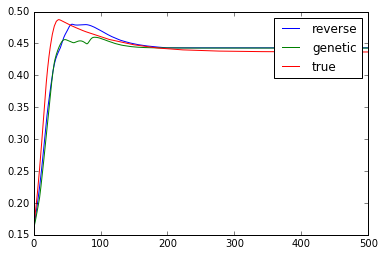

In [106]:
plt.plot(y_1,etr1.predict(np.asarray(targetpred).reshape(1,-1))[0],label='reverse')
plt.plot(y_1,etr1.predict(np.asarray(p[0]).reshape(1,-1))[0],label='genetic')
# plt.plot(y_1,etr1.predict(np.asarray(linpred).reshape(1,-1))[0],label='linear')
plt.plot(y_1,targetdata,label='true')
plt.legend()
plt.show()

C:\Users\Neal\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


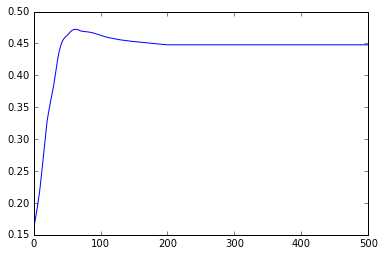

In [96]:
plt.plot(y_1,etr1.predict([0,0,150,200,400,400,400,400,400,400]).tolist()[0])
plt.show()

# Visualizing the Data
## How do the different types of algorithms compare?

In [97]:
# ### plot all 3 on the same chart
# import prettyplotlib as ppl
# print len(data.columns)
# a = []
# aa = []
# aaa = []

# predicted1 = etr1.predict(Y_test)
# predicted2 = dt.predict(Y_test)
# predicted3 = lin.predict(Y_test)
# for j in range(X_test.shape[1]):
#     re = []
#     for i in range(len(X_test)):
#         predicted = predicted1[i][j]*P_std[j] + P_mean[j]
#         true = Y_test[i][j]*P_std[j] + P_mean[j]
#         re.append(np.abs((predicted - true)/true))
#     a.append(re)
#     re=[]
#     for i in range(len(X_test)):
#         predicted = predicted2[i][j]*P_std[j] + P_mean[j]
#         true = Y_test[i][j]*P_std[j] + P_mean[j]
#         re.append(np.abs((predicted - true)/true))
#     aa.append(re)
#     re=[]
#     for i in range(len(X_test)):
#         predicted = predicted3[i][j]*P_std[j] + P_mean[j]
#         true = Y_test[i][j]*P_std[j] + P_mean[j]
#         re.append(np.abs((predicted - true)/true))
#     aaa.append(re)
    
# results1 = np.array(a)
# means1 = np.ndarray(shape=(P.shape[1],))
# stds1 = np.ndarray(shape=(P.shape[1],))
# results2 = np.array(aa)
# means2 = np.ndarray(shape=(P.shape[1],))
# stds2 = np.ndarray(shape=(P.shape[1],))
# results3 = np.array(aaa)
# means3 = np.ndarray(shape=(P.shape[1],))
# stds3 = np.ndarray(shape=(P.shape[1],))


# for p in range(results1.shape[0]):
#     mean1 = results1[p].mean()
#     std1 = results1[p].std()
#     mean2 = results2[p].mean()
#     std2 = results2[p].std()
#     mean3 = results3[p].mean()
#     std3 = results3[p].std()
    
#     means1[p] = mean1
#     stds1[p] = std1/np.sqrt(results1.shape[1])
#     means2[p] = mean2
#     stds2[p] = std2/np.sqrt(results2.shape[1])
#     means3[p] = mean3
#     stds3[p] = std3/np.sqrt(results3.shape[1])
# fig = plt.figure(1, figsize=(8,5))
# ppl.bar(range(results1.shape[0]), means1*100,
#         xticklabels=names, grid='y', alpha=0.7,label='Random Forest') # etr
# ppl.bar(range(results2.shape[0]), means2*100, 
#         grid='y', color='b', alpha=0.4,label='Decision tree') # knn
# ppl.bar(range(results3.shape[0]), means3*100,
#         grid='y', color='r', alpha=0.1, label='Linear') # lin
# # plt.ylim(0,1.2)
# plt.legend()
# plt.ylabel('Mean % Relative Error \n on Test Data', fontsize=20)
# plt.xticks(rotation='vertical', ha='center')
# plt.xlim(0,500)
# plt.show()

### How long does it take to predict?

In [98]:
# import time
# temp5 = X_test[1].reshape(1,-1)
# st=time.time()
# temp4=etr1.predict(temp5)
# print "prediction time:", (time.time()-st)
# print (temp4-Y_test[1])*100

# What about giving each variable its own Random Forest?

In [99]:
# from sklearn.ensemble import ExtraTreesRegressor
# aaaa = []
# for j in range(P.shape[1]):
#     Y_temp = np.zeros((len(YY_train),))
#     Y_temp2 = np.zeros((len(Y_test),))

#     for i in range(len(Y_test)):
#         Y_temp2[i]=Y_test[i][j]
#     start_time = time.time()
#     etr7 = ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
#     etr7.fit(X_train,Y_temp)
#     print names[j], "Test score:", etr7.score(X_test,Y_temp2)
#     predicted3 = etr7.predict(X_test)
#     re = []
#     for i in range(len(Y_test)):
#         predicted = predicted3[i]*P_std[j] + P_mean[j]
#         true = Y_test[i][j]*P_std[j] + P_mean[j]
#         re.append(np.abs((predicted - true)/true))
#     aaaa.append(re)

In [100]:
# results=np.array(a)
# results2 = np.array(aaaa)
# means = np.ndarray(shape=(P.shape[1],))
# stds = np.ndarray(shape=(P.shape[1],))
# means2 = np.ndarray(shape=(P.shape[1],))
# stds2 = np.ndarray(shape=(P.shape[1],))

# for p in range(results.shape[0]):
#     mean = results[p].mean()
#     std = results[p].std()
    
#     means[p] = mean
#     stds[p] = std/np.sqrt(results.shape[1])

# for p in range(results2.shape[0]):  
#     mean2 = results2[p].mean()
#     std2 = results2[p].std()
    
#     means2[p] = mean2
#     stds2[p] = std2/np.sqrt(results2.shape[1])
# import prettyplotlib as ppl

# fig = plt.figure(1, figsize=(8,5))
# ppl.bar(range(results.shape[0]), means*100,
#         xticklabels=names, grid='y', label='One Forest')
# ppl.bar(range(results2.shape[0]), means2*100,
#         xticklabels=names, grid='y', color='b', alpha=0.3, label='41 Forests')
# plt.ylabel('Mean % Relative Error \n on Test Data', fontsize=20)
# plt.xticks(rotation='vertical', ha='center')
# plt.legend()
# plt.xlim(0,P.shape[1])
# plt.show()


# Does adding noise degrade predictions?

In [101]:
# from sklearn.ensemble import ExtraTreesRegressor
# aaaaa = []
# for j in range(P.shape[1]):
#     Y_temp = np.zeros((len(YY_train),))
# #     Y_temp2 = np.zeros((len(Y_test),))
#     for i in range(len(Y_test)):
#         Y_temp2[i]=Y_test[i][j]
#     start_time = time.time()
#     etr8 = ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
#     etr8.fit(X_train_noise,Y_temp)
#     print names[j], "Test score:", etr8.score(X_test_noise,Y_temp2)
#     predicted3 = etr8.predict(X_test_noise)
#     re = []
#     for i in range(len(Y_test)):
#         predicted = predicted3[i]*P_std[j] + P_mean[j]
#         true = Y_test[i][j]*P_std[j] + P_mean[j]
#         re.append(np.abs((predicted - true)/true))
#     aaaaa.append(re)

In [102]:
# results1 = np.array(a)
# results2 = np.array(aaaa)
# results3 = np.array(aaaaa)
# means = np.ndarray(shape=(P.shape[1],))
# stds = np.ndarray(shape=(P.shape[1],))
# means2 = np.ndarray(shape=(P.shape[1],))
# stds2 = np.ndarray(shape=(P.shape[1],))
# means3 = np.ndarray(shape=(P.shape[1],))
# stds3 = np.ndarray(shape=(P.shape[1],))

# for p in range(results1.shape[0]):
#     mean = results1[p].mean()
#     std = results1[p].std()
    
#     means[p] = mean
#     stds[p] = std/np.sqrt(results1.shape[1])

# for p in range(results2.shape[0]):  
#     mean2 = results2[p].mean()
#     std2 = results2[p].std()
    
#     means2[p] = mean2
#     stds2[p] = std2/np.sqrt(results2.shape[1])

# for p in range(results3.shape[0]):  
#     mean3 = results3[p].mean()
#     std3 = results3[p].std()
    
#     means3[p] = mean3
#     stds3[p] = std3/np.sqrt(results3.shape[1])
# import prettyplotlib as ppl

# fig = plt.figure(1, figsize=(8,5))
# ppl.bar(range(results1.shape[0]), means1*100,
#         xticklabels=names, grid='y',label='One Forest')
# ppl.bar(range(results2.shape[0]), means2*100,
#         xticklabels=names, grid='y', color='b', alpha=0.4,label='No Noise')
# ppl.bar(range(results3.shape[0]), means3*100,
#         xticklabels=names, grid='y', color='r', alpha=0.1, label='Added Noise')
# plt.ylabel('Mean % Relative Error \n on Test Data', fontsize=20)
# plt.xticks(rotation='vertical', ha='center')
# plt.legend()
# plt.xlim(0,P.shape[1])
# plt.show()